In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

100%|██████████| 9912422/9912422 [00:00<00:00, 89331750.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 68709979.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26195268.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1230733.82it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



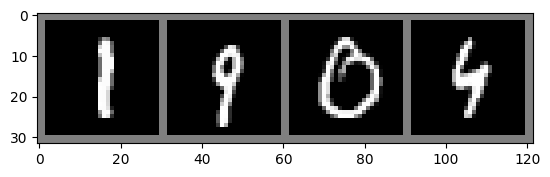

1     9     0     4    


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        return self.fc3(x)

class Net10(nn.Module):
    def __init__(self):
        super(Net10, self).__init__()
        self.fc1 = nn.Linear(28*28, 20)
        # self.fc1_drop = nn.Dropout(0.2)
        # self.fc2 = nn.Linear(300, 50)
        # # self.fc2_drop = nn.Dropout(0.2)
        # self.fc3 = nn.Linear(50, 50)
        # # self.fc3_drop = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(50, 50)
        # # self.fc4_drop = nn.Dropout(0.2)
        # self.fc5 = nn.Linear(50, 50)
        # # self.fc5_drop = nn.Dropout(0.2)
        # self.fc6 = nn.Linear(50, 50)
        # # self.fc6_drop = nn.Dropout(0.2)
        # self.fc7 = nn.Linear(50, 50)
        # # self.fc7_drop = nn.Dropout(0.2)
        # self.fc8 = nn.Linear(50, 50)
        # self.fc8_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(20, 10)
        # self.fc9_drop = nn.Dropout(0.2)
        # self.fc10 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        # # x = self.fc1_drop(x)
        # x = F.relu(self.fc2(x))
        # # x = self.fc2_drop(x)
        # x = F.relu(self.fc3(x))
        # # x = self.fc3_drop(x)
        # x = F.relu(self.fc4(x))
        # # x = self.fc4_drop(x)
        # x = F.relu(self.fc5(x))
        # # x = self.fc5_drop(x)
        # x = F.relu(self.fc6(x))
        # # x = self.fc6_drop(x)
        # x = F.relu(self.fc7(x))
        # # x = self.fc7_drop(x)
        # x = F.relu(self.fc8(x))
        # # x = self.fc8_drop(x)
        # x = F.relu(self.fc9(x))
        # # x = self.fc9_drop(x)
        return self.fc2(x)

# net = Net()
net = Net10()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.837
[1,  4000] loss: 0.469
[1,  6000] loss: 0.399
[1,  8000] loss: 0.374
[1, 10000] loss: 0.371
[1, 12000] loss: 0.362
[1, 14000] loss: 0.322
[2,  2000] loss: 0.336
[2,  4000] loss: 0.325
[2,  6000] loss: 0.317
[2,  8000] loss: 0.297
[2, 10000] loss: 0.322
[2, 12000] loss: 0.313
[2, 14000] loss: 0.311
Finished Training


In [ ]:
net

Net10(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
torch.save(net.state_dict(), 'MLP_2_10layer.pth')
!cp MLP_2_10layer.pth /content/drive/MyDrive/Similarity_Measure

fc1_params = net.fc1.state_dict()
torch.save(fc1_params, 'fc1_params_2_10layer.pth')
!cp fc1_params_2_10layer.pth /content/drive/MyDrive/Similarity_Measure

In [ ]:
# OLD
# fc1_params = net.fc1.state_dict()
# fc2_params = net.fc2.state_dict()
# fc3_params = net.fc3.state_dict()

# torch.save(fc1_params, 'fc1_params_2.pth')
# torch.save(fc2_params, 'fc2_params_2.pth')
# torch.save(fc3_params, 'fc3_params_2.pth')

# !cp fc1_params_2.pth /content/drive/MyDrive/Similarity_Measure
# !cp fc2_params_2.pth /content/drive/MyDrive/Similarity_Measure
# !cp fc3_params_2.pth /content/drive/MyDrive/Similarity_Measure

# import torch
# import torch.nn as nn

# fc1_dummy_1 = nn.Linear(28*28, 50)
# fc1_dummy_1.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc1_params_1.pth'))
# fc1_dummy_2 = nn.Linear(28*28, 50)
# fc1_dummy_2.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc1_params_2.pth'))

# fc2_dummy_1 = nn.Linear(50, 50)
# fc2_dummy_1.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc2_params_1.pth'))
# fc2_dummy_2 = nn.Linear(50, 50)
# fc2_dummy_2.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc2_params_2.pth'))

# fc3_dummy_1 = nn.Linear(50, 10)
# fc3_dummy_1.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc3_params_1.pth'))
# fc3_dummy_2 = nn.Linear(50, 10)
# fc3_dummy_2.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/fc3_params_2.pth'))

# fc1_dummy_1_weights = fc1_dummy_1.weight.detach().numpy()
# fc1_dummy_2_weights = fc1_dummy_2.weight.detach().numpy()
# fc2_dummy_1_weights = fc2_dummy_1.weight.detach().numpy()
# fc2_dummy_2_weights = fc2_dummy_2.weight.detach().numpy()
# fc3_dummy_1_weights = fc3_dummy_1.weight.detach().numpy()
# fc3_dummy_2_weights = fc3_dummy_2.weight.detach().numpy()

# import numpy as np
# def centering(K):
#     n = K.shape[0]
#     unit = np.ones([n, n])
#     I = np.eye(n)
#     H = I - unit / n

#     return np.dot(np.dot(H, K), H)  # HKH are the same with KH, KH is the first centering, H(KH) do the second time, results are the sme with one time centering
#     # return np.dot(H, K)  # KH

# def linear_HSIC(X, Y):
#     L_X = np.dot(X, X.T)
#     L_Y = np.dot(Y, Y.T)
#     return np.sum(centering(L_X) * centering(L_Y))


# def linear_CKA(X, Y):
#     hsic = linear_HSIC(X, Y)
#     var1 = np.sqrt(linear_HSIC(X, X))
#     var2 = np.sqrt(linear_HSIC(Y, Y))

#     return hsic / (var1 * var2)

# print(
#     linear_CKA(fc1_dummy_1_weights.T, fc1_dummy_2_weights.T),
#     linear_CKA(fc2_dummy_1_weights.T, fc2_dummy_2_weights.T),
#     linear_CKA(fc3_dummy_1_weights.T, fc3_dummy_2_weights.T),
# )

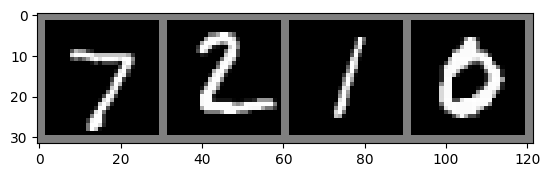

GroundTruth:  7     2     1     0    


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 93 %


In [ ]:
for i in range(10):
  model1 = Net10()  # Or any neural network of your choice
  model1.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/MLP_1_10layer.pth'))
  with torch.no_grad():
    model1.fc1.weight[10+i:, :] = torch.zeros((1, 784))

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model1(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 60 %
Accuracy of the network on the test images: 71 %
Accuracy of the network on the test images: 79 %
Accuracy of the network on the test images: 79 %
Accuracy of the network on the test images: 82 %
Accuracy of the network on the test images: 82 %
Accuracy of the network on the test images: 92 %
Accuracy of the network on the test images: 92 %
Accuracy of the network on the test images: 92 %
Accuracy of the network on the test images: 93 %


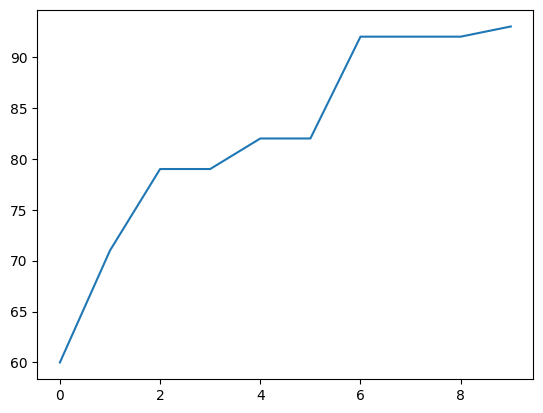

In [ ]:
plt.plot([60, 71, 79, 79, 82, 82, 92, 92, 92, 93])

MLP1: ?% accuracy, MLP2: ?% accuracy

In [ ]:
!pip install torch_cka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch_cka import CKA

model1 = Net10()  # Or any neural network of your choice
model2 = Net10()

model1.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/MLP_1_10layer.pth'))
model2.load_state_dict(torch.load('/content/drive/MyDrive/Similarity_Measure/MLP_2_10layer.pth'))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  model1.fc1.weight[19:, :] = torch.zeros((1, 784))

In [ ]:
model1.fc1.weight

Parameter containing:
tensor([[-0.0478, -0.0006, -0.0401,  ..., -0.0267, -0.0132, -0.0530],
        [-0.0367,  0.0050,  0.0194,  ..., -0.0103, -0.0116,  0.0209],
        [-0.0206,  0.0046,  0.0039,  ..., -0.0179,  0.0272,  0.0027],
        ...,
        [-0.0123, -0.0334,  0.0232,  ..., -0.0083, -0.0200,  0.0236],
        [-0.0171, -0.0246,  0.0059,  ...,  0.0083,  0.0120,  0.0095],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       requires_grad=True)

In [ ]:
dataloader = torch.utils.data.DataLoader(testloader,
                        batch_size=batch_size, # according to your device memory
                        shuffle=False)  # Don't forget to seed your dataloader

layer_list = ['fc1', 'fc2']
cka = CKA(model1, model2,
          model1_name="MLP_1",   # good idea to provide names to avoid confusion
          model2_name="MLP_2",
          model1_layers=layer_list, # List of layers to extract features from
          model2_layers=layer_list, # extracts all layer features by default
          # device='cuda'
)

cka.compare(testloader) # secondary dataloader is optional

results = cka.export()  # returns a dict that contains model names, layer names
                        # and the CKA matrix

| Comparing features |: 100%|██████████| 2500/2500 [00:28<00:00, 88.09it/s]


In [ ]:
results

{'model1_name': 'MLP_1',
 'model2_name': 'MLP_2',
 'CKA': tensor([[0.9074, 0.7660],
         [0.7872, 0.8459]]),
 'model1_layers': ['fc1', 'fc2'],
 'model2_layers': ['fc1', 'fc2'],
 'dataset1_name': 'Dataset MNIST',
 'dataset2_name': 'Dataset MNIST'}

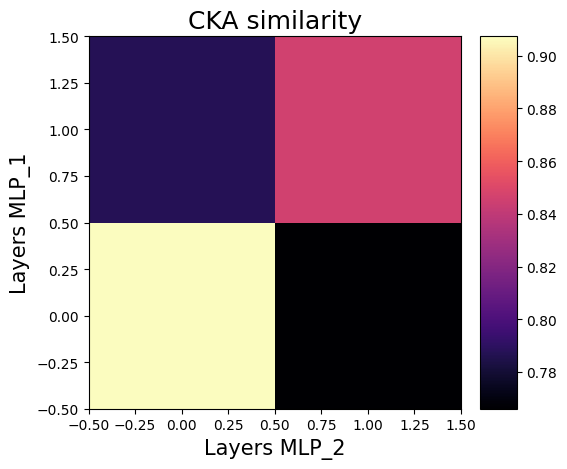

In [ ]:
cka.plot_results(save_path='/content/cka_matrix_mlp_10_layer.png', title='CKA similarity')

In [ ]:
model1.fc1.weight.detach().numpy()

array([[-0.01959784, -0.02207433, -0.03099435, ...,  0.02824504,
         0.03387943,  0.02243337],
       [-0.00825707, -0.02979201,  0.01854116, ..., -0.02524279,
        -0.00402272,  0.00574466],
       [ 0.0012513 , -0.00083775,  0.00586052, ..., -0.00989172,
         0.02153786, -0.01890779],
       ...,
       [ 0.01561665, -0.02276044, -0.0173142 , ..., -0.00441537,
         0.01303759, -0.00944135],
       [ 0.02188701, -0.02392175,  0.00573039, ...,  0.03087194,
         0.02272674, -0.01308155],
       [ 0.01757833,  0.02454025,  0.02980121, ...,  0.02289809,
         0.01682751, -0.01600917]], dtype=float32)

In [ ]:
fc1_1 = torch.load('/content/drive/MyDrive/Similarity_Measure/fc1_params_1_10layer.pth')
fc1_2 = torch.load('/content/drive/MyDrive/Similarity_Measure/fc1_params_2_10layer.pth')
fc1_1['weight'].shape, fc1_2['weight'].shape

# fc1_1 = model1.fc1.weight.detach().numpy()
# fc1_2 = model2.fc1.weight.detach().numpy()

(torch.Size([20, 784]), torch.Size([20, 784]))

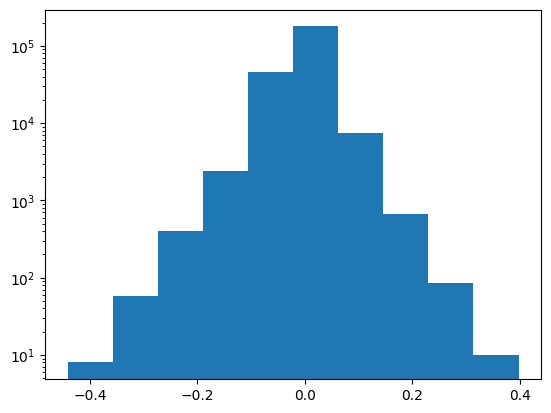

In [ ]:
plt.hist(fc1_1['weight'].flatten())
plt.yscale('log')

In [ ]:
# cov_mat = np.empty((300, 300))
# for i, x in enumerate(fc1_1['weight']):
#   for j, y in enumerate(fc1_2['weight']):
#     print(np.cov(x, y).shape)
#     cov_mat[i, j] = np.cov(x, y)
# cov_mat.shape

In [ ]:
fc1_1['weight'].mean(axis=1).shape, fc1_2['weight'].mean(axis=1).shape

(torch.Size([20]), torch.Size([20]))

In [ ]:
# x = np.cov(np.vstack((fc1_1['weight'], fc1_2['weight'])))
# xsame = np.cov(np.vstack((fc1_1['weight'].flatten(), fc1_2['weight'].flatten())))
# x.shape, xsame.shape
import numpy as np
x = np.cov(np.vstack((fc1_1['weight'].mean(axis=1), fc1_2['weight'].mean(axis=1))).T)
x.shape

# import numpy as np
# x = np.cov(np.vstack((np.median(fc1_1, axis=1), np.median(fc1_2, axis=1))).T)
# x.shape

(20, 20)

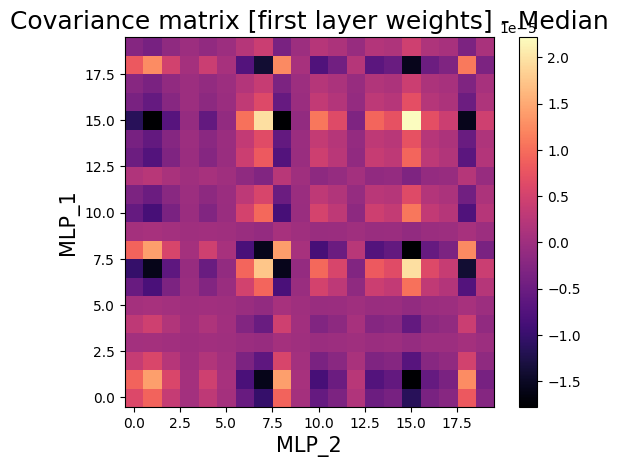

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x, origin='lower', cmap='magma'); plt.title('Covariance matrix [first layer weights] - Median', fontsize=18)
plt.xlabel('MLP_2', fontsize=15)
plt.ylabel('MLP_1', fontsize=15)
plt.colorbar()
plt.savefig('cov_mat_first_layer_weights_20_neurons.png', bbox_inches='tight', dpi=200)

In [ ]:
!ls -lh

total 608K
-rw-r--r-- 1 root root 600K May  1 11:43 cov_matrix_1st_layer_weights.png
drwx------ 5 root root 4.0K May  1 11:31 drive
drwxr-xr-x 1 root root 4.0K Apr 27 13:35 sample_data


In [ ]:
import math
import numpy as np

def centering(K):
    n = K.shape[0]
    unit = np.ones([n, n])
    I = np.eye(n)
    H = I - unit / n

    return np.dot(np.dot(H, K), H)  # HKH are the same with KH, KH is the first centering, H(KH) do the second time, results are the sme with one time centering
    # return np.dot(H, K)  # KH


def rbf(X, sigma=None):
    GX = np.dot(X, X.T)
    KX = np.diag(GX) - GX + (np.diag(GX) - GX).T
    if sigma is None:
        mdist = np.median(KX[KX != 0])
        sigma = math.sqrt(mdist)
    KX *= - 0.5 / (sigma * sigma)
    KX = np.exp(KX)
    return KX


def kernel_HSIC(X, Y, sigma):
    return np.sum(centering(rbf(X, sigma)) * centering(rbf(Y, sigma)))


def linear_HSIC(X, Y):
    L_X = np.dot(X, X.T)
    L_Y = np.dot(Y, Y.T)
    return np.sum(centering(L_X) * centering(L_Y))


def linear_CKA(X, Y):
    hsic = linear_HSIC(X, Y)
    var1 = np.sqrt(linear_HSIC(X, X))
    var2 = np.sqrt(linear_HSIC(Y, Y))

    return hsic / (var1 * var2)


def kernel_CKA(X, Y, sigma=None):
    hsic = kernel_HSIC(X, Y, sigma)
    var1 = np.sqrt(kernel_HSIC(X, X, sigma))
    var2 = np.sqrt(kernel_HSIC(Y, Y, sigma))

    return hsic / (var1 * var2)

In [ ]:
np.expand_dims(fc11[0], 1).shape

(784, 1)

In [ ]:
fc11.shape

(20, 784)

In [ ]:
fc11 = fc1_1['weight'].numpy()
fc12 = fc1_2['weight'].numpy()

# print(fc1_1.shape, fc1_2.shape)  # (300,), (300,)

cka_weights = np.empty((20, 20))
for i in range(20):
  for j in range(20):
    lcka = linear_CKA(
        np.expand_dims(fc11[i], 1), np.expand_dims(fc12[j], 1)
    )
    cka_weights[i, j] = lcka
# linear_CKA(np.expand_dims(fc1_1['weight'].numpy().mean(axis=1), 1), np.expand_dims(fc1_2['weight'].numpy().mean(axis=1), 1))
cka_weights.shape

(20, 20)

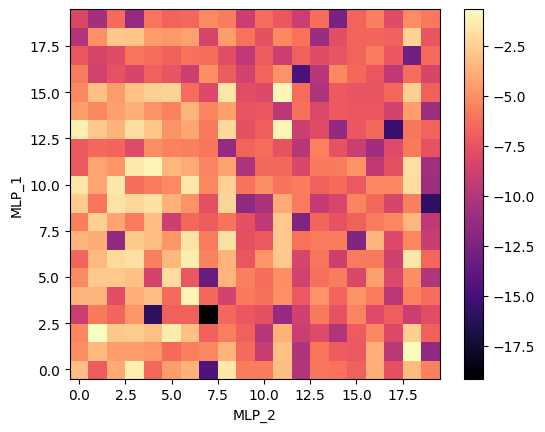

In [ ]:
# cka_weights
plt.imshow(np.log(cka_weights), origin='lower', cmap='magma'); plt.xlabel('MLP_2'); plt.ylabel('MLP_1'); plt.colorbar(); plt.savefig('cka_weights_20_neurons.png', dpi=250, bbox_inches='tight')

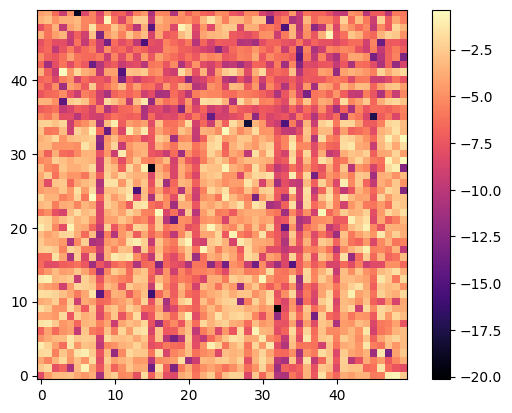

In [ ]:
plt.imshow(np.log(cka_weights), origin='lower', cmap='magma'); plt.colorbar()

# CAMELS

In [ ]:
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/inference/weights/weights_IllustrisTNG_HI_1_all_steps_500_500_o3.pt
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/inference/weights/weights_IllustrisTNG_HI_16_all_steps_500_500_o3.pt
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/inference/databases/IllustrisTNG_o3_HI_all_steps_500_500_o3.db

--2023-05-05 13:45:41--  https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/inference/weights/weights_IllustrisTNG_HI_1_all_steps_500_500_o3.pt
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 144.121.86.9
Connecting to users.flatironinstitute.org (users.flatironinstitute.org)|144.121.86.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33913175 (32M) [application/octet-stream]
Saving to: ‘weights_IllustrisTNG_HI_1_all_steps_500_500_o3.pt’

weights_IllustrisTN 100%[===================>]  32.34M  75.3MB/s    in 0.4s    

2023-05-05 13:45:42 (75.3 MB/s) - ‘weights_IllustrisTNG_HI_1_all_steps_500_500_o3.pt’ saved [33913175/33913175]

--2023-05-05 13:45:42--  https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/inference/weights/weights_IllustrisTNG_HI_16_all_steps_500_500_o3.pt
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 144.1

In [ ]:
!pip install optuna==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.7/282.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11135 sha256=158acccca5c074441122211c60e7b0addcb14d0245323631c964eba3a745d98d
  Stored in directory: /root/.cache/pip/wheels/04/24/fe/140a94a7f1036003ede94579e6b4227fe96c840c6f4dcbe307
Successfully built pyperclip


In [ ]:
import numpy as np
import optuna
from google.colab import drive
import torch
import torch.nn as nn
import sys,os

In [ ]:
fweights_1   = '/content/weights_IllustrisTNG_HI_16_all_steps_500_500_o3.pt'
fweights_2 = '/content/weights_IllustrisTNG_HI_1_all_steps_500_500_o3.pt'
fdatabase  = 'sqlite://///content/IllustrisTNG_o3_HI_all_steps_500_500_o3.db'
study_name = 'wd_dr_hidden_lr_o3'

trial_number_1 = int(fweights_1.split('/')[2].split('_')[3])
trial_number_2 = int(fweights_2.split('/')[2].split('_')[3])

In [ ]:
class model_o3_err(nn.Module):
    def __init__(self, hidden, dr, channels):
        super(model_o3_err, self).__init__()

        # input: 1x256x256 ---------------> output: 2*hiddenx128x128
        self.C01 = nn.Conv2d(channels,  2*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C02 = nn.Conv2d(2*hidden,  2*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C03 = nn.Conv2d(2*hidden,  2*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B01 = nn.BatchNorm2d(2*hidden)
        self.B02 = nn.BatchNorm2d(2*hidden)
        self.B03 = nn.BatchNorm2d(2*hidden)

        # input: 2*hiddenx128x128 ----------> output: 4*hiddenx64x64
        self.C11 = nn.Conv2d(2*hidden, 4*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C12 = nn.Conv2d(4*hidden, 4*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C13 = nn.Conv2d(4*hidden, 4*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B11 = nn.BatchNorm2d(4*hidden)
        self.B12 = nn.BatchNorm2d(4*hidden)
        self.B13 = nn.BatchNorm2d(4*hidden)

        # input: 4*hiddenx64x64 --------> output: 8*hiddenx32x32
        self.C21 = nn.Conv2d(4*hidden, 8*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C22 = nn.Conv2d(8*hidden, 8*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C23 = nn.Conv2d(8*hidden, 8*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B21 = nn.BatchNorm2d(8*hidden)
        self.B22 = nn.BatchNorm2d(8*hidden)
        self.B23 = nn.BatchNorm2d(8*hidden)

        # input: 8*hiddenx32x32 ----------> output: 16*hiddenx16x16
        self.C31 = nn.Conv2d(8*hidden,  16*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C32 = nn.Conv2d(16*hidden, 16*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C33 = nn.Conv2d(16*hidden, 16*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B31 = nn.BatchNorm2d(16*hidden)
        self.B32 = nn.BatchNorm2d(16*hidden)
        self.B33 = nn.BatchNorm2d(16*hidden)

        # input: 16*hiddenx16x16 ----------> output: 32*hiddenx8x8
        self.C41 = nn.Conv2d(16*hidden, 32*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C42 = nn.Conv2d(32*hidden, 32*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C43 = nn.Conv2d(32*hidden, 32*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B41 = nn.BatchNorm2d(32*hidden)
        self.B42 = nn.BatchNorm2d(32*hidden)
        self.B43 = nn.BatchNorm2d(32*hidden)

        # input: 32*hiddenx8x8 ----------> output:64*hiddenx4x4
        self.C51 = nn.Conv2d(32*hidden, 64*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C52 = nn.Conv2d(64*hidden, 64*hidden, kernel_size=3, stride=1, padding=1,
                            padding_mode='circular', bias=True)
        self.C53 = nn.Conv2d(64*hidden, 64*hidden, kernel_size=2, stride=2, padding=0,
                            padding_mode='circular', bias=True)
        self.B51 = nn.BatchNorm2d(64*hidden)
        self.B52 = nn.BatchNorm2d(64*hidden)
        self.B53 = nn.BatchNorm2d(64*hidden)

        # input: 64*hiddenx4x4 ----------> output: 128*hiddenx1x1
        self.C61 = nn.Conv2d(64*hidden, 128*hidden, kernel_size=4, stride=1, padding=0,
                            padding_mode='circular', bias=True)
        self.B61 = nn.BatchNorm2d(128*hidden)

        self.P0  = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

        self.FC1  = nn.Linear(128*hidden, 64*hidden)
        self.FC2  = nn.Linear(64*hidden,  12)

        self.dropout   = nn.Dropout(p=dr)
        self.ReLU      = nn.ReLU()
        self.LeakyReLU = nn.LeakyReLU(0.2)
        self.tanh      = nn.Tanh()

        for m in self.modules():
            if isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)


    def forward(self, image):

        x = self.LeakyReLU(self.C01(image))
        x = self.LeakyReLU(self.B02(self.C02(x)))
        x = self.LeakyReLU(self.B03(self.C03(x)))

        x = self.LeakyReLU(self.B11(self.C11(x)))
        x = self.LeakyReLU(self.B12(self.C12(x)))
        x = self.LeakyReLU(self.B13(self.C13(x)))

        x = self.LeakyReLU(self.B21(self.C21(x)))
        x = self.LeakyReLU(self.B22(self.C22(x)))
        x = self.LeakyReLU(self.B23(self.C23(x)))

        x = self.LeakyReLU(self.B31(self.C31(x)))
        x = self.LeakyReLU(self.B32(self.C32(x)))
        x = self.LeakyReLU(self.B33(self.C33(x)))

        x = self.LeakyReLU(self.B41(self.C41(x)))
        x = self.LeakyReLU(self.B42(self.C42(x)))
        x = self.LeakyReLU(self.B43(self.C43(x)))

        x = self.LeakyReLU(self.B51(self.C51(x)))
        x = self.LeakyReLU(self.B52(self.C52(x)))
        x = self.LeakyReLU(self.B53(self.C53(x)))

        x = self.LeakyReLU(self.B61(self.C61(x)))

        x = x.view(image.shape[0],-1)
        x = self.dropout(x)
        x = self.dropout(self.LeakyReLU(self.FC1(x)))
        x = self.FC2(x)

        # enforce the errors to be positive
        y = torch.clone(x)
        y[:,6:12] = torch.square(x[:,6:12])

        return y

In [ ]:
def load_two_models_for_similarity_measure(fweights_1, fweights_2, fdatabase, study_name, trial_number_1, trial_number_2):
  study = optuna.load_study(study_name=study_name, storage=fdatabase)

  for t in [trial_number_1, trial_number_2]:
    print(f"\nTrial number: {t}")
    trial_number = t
    trial = study.trials[trial_number]
    print("Trial number:  number {}".format(trial.number))
    print("Loss:          %.5e"%trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

  if torch.cuda.is_available():
    print("GPUs available")
    device = torch.device('cuda')
  else:
    print('GPUs not available')
    device = torch.device('cpu')

  models = []
  for fw in [fweights_1, fweights_2]:
    model = model_o3_err(trial.params['hidden'], trial.params['dr'], 1)
    model = nn.DataParallel(model)
    model.to(device=device)
    network_total_params = sum(p.numel() for p in model.parameters())
    print('total number of parameters in the model = %d'%network_total_params)

    if os.path.exists(fw):
      model.load_state_dict(torch.load(fw, map_location=torch.device(device)))
      print('Weights loaded')
      models.append(model)
    else:
      raise Exception('file with weights not found!!!')

  if len(models) != 2:
    print("Warning! Two models were not loaded...")
  return models

In [ ]:
models = load_two_models_for_similarity_measure(fweights_1, fweights_2, fdatabase, study_name, trial_number_1, trial_number_2)


Trial number: 16
Trial number:  number 16
Loss:          -1.17320e+01
Params: 
    dr: 0.4215669874309596
    hidden: 6
    lr: 0.0003684461504422994
    wd: 0.009957489933288342

Trial number: 1
Trial number:  number 1
Loss:          -7.02081e+00
Params: 
    dr: 0.7563817360892492
    hidden: 6
    lr: 1.897900260426883e-05
    wd: 5.329683633859509e-06
GPUs not available
total number of parameters in the model = 8466876
Weights loaded
total number of parameters in the model = 8466876
Weights loaded


In [ ]:
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/params_IllustrisTNG.txt

--2023-05-05 14:47:31--  https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/params_IllustrisTNG.txt
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 144.121.86.9
Connecting to users.flatironinstitute.org (users.flatironinstitute.org)|144.121.86.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48000 (47K) [text/plain]
Saving to: ‘params_IllustrisTNG.txt’

params_IllustrisTNG 100%[===================>]  46.88K  --.-KB/s    in 0.02s   

2023-05-05 14:47:31 (1.96 MB/s) - ‘params_IllustrisTNG.txt’ saved [48000/48000]



In [ ]:
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/Maps_HI_IllustrisTNG_CV_z=0.00.npy

--2023-05-05 13:46:54--  https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/Maps_HI_IllustrisTNG_CV_z=0.00.npy
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 144.121.86.9
Connecting to users.flatironinstitute.org (users.flatironinstitute.org)|144.121.86.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106168448 (101M) [application/octet-stream]
Saving to: ‘Maps_HI_IllustrisTNG_CV_z=0.00.npy’

Maps_HI_IllustrisTN 100%[===================>] 101.25M   105MB/s    in 1.0s    

2023-05-05 13:46:55 (105 MB/s) - ‘Maps_HI_IllustrisTNG_CV_z=0.00.npy’ saved [106168448/106168448]



In [ ]:
models[0]

DataParallel(
  (module): model_o3_err(
    (C01): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
    (C02): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
    (C03): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2), padding_mode=circular)
    (B01): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (B02): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (B03): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (C11): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
    (C12): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
    (C13): Conv2d(24, 24, kernel_size=(2, 2), stride=(2, 2), padding_mode=circular)
    (B11): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (B12): BatchNorm2d(24, ep

Since the kernel size is (3, 3), these 9 entries are the weights of the convolutional layer we need.

(12, 3, 3) (12, 3, 3)


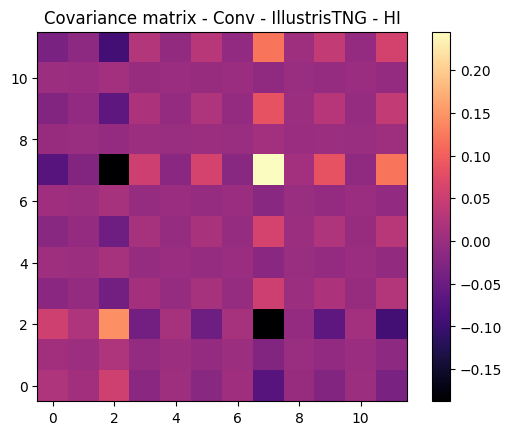

In [ ]:
with torch.no_grad():
  m1 = models[0].module.C01.weight.squeeze().numpy()
  m2 = models[1].module.C01.weight.squeeze().numpy()

print(m1.shape, m2.shape)

import matplotlib.pyplot as plt
x = np.cov(
      np.vstack(
          (
              np.max(m1, axis=(1, 2)), np.max(m2, axis=(1, 2))
          )
      ).T
)

# x = np.cov(
#       np.vstack(
#           (
#               m1.reshape(m1.shape[0], -1), m2.reshape(m2.shape[0], -1)
#           )
#       )
# )

plt.imshow(x, origin='lower', cmap='magma'); plt.title('Covariance matrix - Conv - IllustrisTNG - HI');
plt.colorbar(); plt.savefig('camels_conv_illustrisTNG_HI_trial_16_and_1.png', bbox_inches='tight', dpi=250)

Future exp: with torch_cka

In [ ]:
!pip install torch_cka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch_cka import CKA

In [ ]:
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')

CUDA Not Available


In [ ]:
# This routine returns the data loader need to train the network
def create_dataset_multifield(mode, seed, fmaps, fparams, batch_size, splits, fmaps_norm,
                              rot_flip_in_mem=True, shuffle=True, verbose=False):

    # whether rotations and flippings are kept in memory
    if rot_flip_in_mem:
        data_set = make_dataset_multifield(mode, seed, fmaps, fparams, splits, fmaps_norm, verbose)
    else:
        data_set = make_dataset_multifield2(mode, seed, fmaps, fparams, splits, fmaps_norm, verbose)

    data_loader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=shuffle)
    return data_loader


# This class creates the dataset. Rotations and flippings are precompued and stored in memory
class make_dataset_multifield():

    def __init__(self, mode, seed, fmaps, fparams, splits, fmaps_norm, verbose):

        # get the total number of sims and maps
        params_sims = np.loadtxt(fparams) #simulations parameters, NOT maps parameters
        total_sims, total_maps, num_params = \
                params_sims.shape[0], params_sims.shape[0]*splits, params_sims.shape[1]
        params_maps = np.zeros((total_maps, num_params), dtype=np.float32)
        for i in range(total_sims):
            for j in range(splits):
                params_maps[i*splits + j] = params_sims[i]

        # normalize the value of the cosmological & astrophysical parameters
        minimum     = np.array([0.1, 0.6, 0.25, 0.25, 0.5, 0.5])
        maximum     = np.array([0.5, 1.0, 4.00, 4.00, 2.0, 2.0])
        params_maps = (params_maps - minimum)/(maximum - minimum)

        # get the size and offset depending on the type of dataset
        if   mode=='train':  offset, size_sims = int(0.00*total_sims), int(0.90*total_sims)
        elif mode=='valid':  offset, size_sims = int(0.90*total_sims), int(0.05*total_sims)
        elif mode=='test':   offset, size_sims = int(0.95*total_sims), int(0.05*total_sims)
        elif mode=='all':    offset, size_sims = int(0.00*total_sims), int(1.00*total_sims)
        else:                raise Exception('Wrong name!')
        size_maps = size_sims*splits

        # randomly shuffle the simulations (not maps). Instead of 0 1 2 3...999 have a
        # random permutation. E.g. 5 9 0 29...342
        np.random.seed(seed)
        sim_numbers = np.arange(total_sims) #shuffle sims not maps
        np.random.shuffle(sim_numbers)
        sim_numbers = sim_numbers[offset:offset+size_sims] #select indexes of mode

        # get the corresponding indexes of the maps associated to the sims
        indexes = np.zeros(size_maps, dtype=np.int32)
        count = 0
        for i in sim_numbers:
            for j in range(splits):
                indexes[count] = i*splits + j
                count += 1

        # keep only the value of the parameters of the considered maps
        params_maps = params_maps[indexes]

        # define the matrix containing the maps with rotations and flipings
        channels = len(fmaps)
        dumb     = np.load(fmaps[0])    #[number of maps, height, width]
        height, width = dumb.shape[1], dumb.shape[2];  del dumb
        data     = np.zeros((size_maps*8, channels, height, width), dtype=np.float32)
        params   = np.zeros((size_maps*8, num_params),              dtype=np.float32)

        # read the data
        print('Found %d channels\nReading data...'%channels)
        for channel, (fim, fnorm) in enumerate(zip(fmaps, fmaps_norm)):

            # read maps in the considered channel
            data_c = np.load(fim)
            print(data_c.shape, total_maps)
            if data_c.shape[0]!=total_maps:  raise Exception('sizes do not match')
            if verbose:  print('%.3e < F(all|orig) < %.3e'%(np.min(data_c), np.max(data_c)))

            # rescale maps
            if fim.find('Mstar')!=-1:  data_c = np.log10(data_c + 1.0)
            else:                      data_c = np.log10(data_c)
            if verbose:  print('%.3f < F(all|resc)  < %.3f'%(np.min(data_c), np.max(data_c)))

            # normalize maps
            if fnorm is None:
                mean,    std     = np.mean(data_c), np.std(data_c)
            else:
                # read data
                data_norm = np.load(fnorm)

                # rescale
                if fnorm.find('Mstar')!=-1:  data_norm = np.log10(data_norm + 1.0)
                else:                        data_norm = np.log10(data_norm)

                # compute mean and std
                mean,    std     = np.mean(data_norm), np.std(data_norm)
                del data_norm

            data_c = (data_c - mean)/std
            if verbose:  print('%.3f < F(all|norm) < %.3f'%(np.min(data_c), np.max(data_c)))

            # keep only the data of the chosen set
            data_c = data_c[indexes]

            # do a loop over all rotations (each is 90 deg)
            counted_maps = 0
            for rot in [0,1,2,3]:
                data_rot = np.rot90(data_c, k=rot, axes=(1,2))

                data[counted_maps:counted_maps+size_maps,channel,:,:] = data_rot
                params[counted_maps:counted_maps+size_maps]           = params_maps
                counted_maps += size_maps

                data[counted_maps:counted_maps+size_maps,channel,:,:] = \
                                                    np.flip(data_rot, axis=1)
                params[counted_maps:counted_maps+size_maps]           = params_maps
                counted_maps += size_maps

            if verbose:
                print('Channel %d contains %d maps'%(channel,counted_maps))
                print('%.3f < F < %.3f\n'%(np.min(data_c), np.max(data_c)))

        self.size = data.shape[0]
        self.x    = torch.tensor(data,   dtype=torch.float32)
        self.y    = torch.tensor(params, dtype=torch.float32)
        del data, data_c

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# This class creates the dataset. It will read the maps and store them in memory.
# The rotations and flipings are done when calling the data
class make_dataset_multifield2():

    def __init__(self, mode, seed, fmaps, fparams, splits, fmaps_norm, verbose):

        # get the total number of simulations and maps
        params_sims = np.loadtxt(fparams) #simulations parameters, NOT maps parameters
        total_sims, total_maps, num_params = \
                params_sims.shape[0], params_sims.shape[0]*splits, params_sims.shape[1]
        params = np.zeros((total_maps, num_params), dtype=np.float32)
        for i in range(total_sims):
            for j in range(splits):
                params[i*splits + j] = params_sims[i]

        # normalize params
        minimum = np.array([0.1, 0.6, 0.25, 0.25, 0.5, 0.5])
        maximum = np.array([0.5, 1.0, 4.00, 4.00, 2.0, 2.0])
        params  = (params - minimum)/(maximum - minimum)

        # get the size and offset depending on the type of dataset
        if   mode=='train':  offset, size_sims = int(0.00*total_sims), int(0.90*total_sims)
        elif mode=='valid':  offset, size_sims = int(0.90*total_sims), int(0.05*total_sims)
        elif mode=='test':   offset, size_sims = int(0.95*total_sims), int(0.05*total_sims)
        elif mode=='all':    offset, size_sims = int(0.00*total_sims), int(1.00*total_sims)
        else:                raise Exception('Wrong name!')
        size_maps = size_sims*splits

        # randomly shuffle the simulations (not maps). Instead of 0 1 2 3...999 have a
        # random permutation. E.g. 5 9 0 29...342
        np.random.seed(seed)
        sim_numbers = np.arange(total_sims) #shuffle maps not rotations
        np.random.shuffle(sim_numbers)
        sim_numbers = sim_numbers[offset:offset+size_sims] #select indexes of mode

        # get the corresponding indexes of the maps associated to the sims
        indexes = np.zeros(size_maps, dtype=np.int32)
        count = 0
        for i in sim_numbers:
            for j in range(splits):
                indexes[count] = i*splits + j
                count += 1

        # keep only the value of the parameters of the considered maps
        params = params[indexes]

        # define the matrix containing the maps without rotations or flippings
        channels = len(fmaps)
        dumb     = np.load(fmaps[0])    #[number of maps, height, width]
        height, width = dumb.shape[1], dumb.shape[2];  del dumb
        data     = np.zeros((size_maps, channels, height, width), dtype=np.float32)

        # read the data
        print('Found %d channels\nReading data...'%channels)
        for channel, (fim, fnorm) in enumerate(zip(fmaps, fmaps_norm)):

            # read maps in the considered channel
            data_c = np.load(fim)
            print(data_c.shape, total_maps)
            if data_c.shape[0]!=total_maps:  raise Exception('sizes do not match')
            if verbose:
                print('%.3e < F(all|orig) < %.3e'%(np.min(data_c), np.max(data_c)))

            # rescale maps
            if fim.find('Mstar')!=-1:  data_c = np.log10(data_c + 1.0)
            else:                      data_c = np.log10(data_c)
            if verbose:
                print('%.3f < F(all|resc)  < %.3f'%(np.min(data_c), np.max(data_c)))

            # normalize maps
            if fnorm is None:
                mean,    std     = np.mean(data_c), np.std(data_c)
                minimum, maximum = np.min(data_c),  np.max(data_c)
            else:
                # read data
                data_norm     = np.load(fnorm)

                # rescale data
                if fnorm.find('Mstar')!=-1:  data_norm = np.log10(data_norm + 1.0)
                else:                        data_norm = np.log10(data_norm)

                # compute mean and std
                mean,    std     = np.mean(data_norm), np.std(data_norm)
                minimum, maximum = np.min(data_norm),  np.max(data_norm)
                del data_norm

            data_c = (data_c - mean)/std
            if verbose:  print('%.3f < F(all|norm) < %.3f'%(np.min(data_c), np.max(data_c)))

            # keep only the data of the chosen set
            data[:,channel,:,:] = data_c[indexes]

        self.size = data.shape[0]
        self.x    = torch.tensor(data,   dtype=torch.float32)
        self.y    = torch.tensor(params, dtype=torch.float32)
        del data, data_c

    def __len__(self):
        return self.size

    def __getitem__(self, idx):

        # choose a rotation angle (0-0, 1-90, 2-180, 3-270)
        # and whether do flipping or not
        rot  = np.random.randint(0,4)
        flip = np.random.randint(0,1)

        # rotate and flip the maps
        maps = torch.rot90(self.x[idx], k=rot, dims=[1,2])
        if flip==1:  maps = torch.flip(maps, dims=[1])

        return maps, self.y[idx]

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
!wget https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/Maps_HI_IllustrisTNG_LH_z=0.00.npy

--2023-05-05 13:55:00--  https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/Maps_HI_IllustrisTNG_LH_z=0.00.npy
Resolving users.flatironinstitute.org (users.flatironinstitute.org)... 144.121.86.9
Connecting to users.flatironinstitute.org (users.flatironinstitute.org)|144.121.86.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3932160128 (3.7G) [application/octet-stream]
Saving to: ‘Maps_HI_IllustrisTNG_LH_z=0.00.npy’

Maps_HI_IllustrisTN 100%[===================>]   3.66G  62.1MB/s    in 45s     

2023-05-05 13:55:46 (82.7 MB/s) - ‘Maps_HI_IllustrisTNG_LH_z=0.00.npy’ saved [3932160128/3932160128]



In [ ]:
import numpy as np
fmaps = '/content/Maps_HI_IllustrisTNG_LH_z=0.00.npy'
maps  = np.load(fmaps)
print('Shape of the maps:',maps.shape)

Shape of the maps: (15000, 256, 256)


In [ ]:
splits     = 5   #number of maps per simulation

# define the array that will contain the indexes of the maps
indexes = np.zeros(1000*splits, dtype=np.int32)

# do a loop over all maps and choose the ones we want
count = 0
for i in range(15000):
    if i%15 in np.arange(splits):
      indexes[count] = i
      count += 1
print('Selected %d maps out of 15000'%count)

# save these maps to a new file
maps = maps[indexes]
np.save('maps_T.npy', maps)
del maps

Selected 5000 maps out of 15000


In [ ]:
# data parameters
fmaps      = ['/content/maps_T.npy'] #tuple containing the maps with the different fields to consider
fmaps_norm = [None] #if you want to normalize the maps according to the properties of some data set, put that data set here (This is mostly used when training on IllustrisTNG and testing on SIMBA, or vicerversa)
fparams    = '/content/params_IllustrisTNG.txt'
seed       = 1   #random seed to split maps among training, validation and testing
model = models[0]


batch_size = 16
lr         = 0.0003684461504422994
wd         = 0.009957489933288342  #value of weight decay
dr         = 0.4215669874309596    #dropout value for fully connected layers
hidden     = 6      #this determines the number of channels in the CNNs; integer larger than 1
# epochs     = 100    #number of epochs to train the network

channels        = 1                #we only consider here 1 field
params          = [0,1,2,3,4,5]    #0(Omega_m) 1(sigma_8) 2(A_SN1) 3 (A_AGN1) 4(A_SN2) 5(A_AGN2). The code will be trained to predict all these parameters.
g               = params           #g will contain the mean of the posterior
h               = [6+i for i in g] #h will contain the variance of the posterior

# load test set
test_loader  = create_dataset_multifield('test', seed, fmaps, fparams, batch_size, splits, fmaps_norm,
                                         rot_flip_in_mem=False, verbose=True)

# get the number of maps in the test set
num_maps = 0
for x,y in test_loader:
      num_maps += x.shape[0]
print('\nNumber of maps in the test set: %d'%num_maps)

# define the arrays containing the value of the parameters
params_true = np.zeros((num_maps,6), dtype=np.float32)
params_NN   = np.zeros((num_maps,6), dtype=np.float32)
errors_NN   = np.zeros((num_maps,6), dtype=np.float32)

# get test loss
test_loss1, test_loss2 = torch.zeros(len(g)).to(device), torch.zeros(len(g)).to(device)
test_loss, points = 0.0, 0
model.eval()
for x, y in test_loader:
    with torch.no_grad():
        bs    = x.shape[0]    #batch size
        x     = x.to(device)  #send data to device
        y     = y.to(device)  #send data to device
        p     = model(x)      #prediction for mean and variance
        y_NN  = p[:,:6]       #prediction for mean
        e_NN  = p[:,6:]       #prediction for error
        loss1 = torch.mean((y_NN[:,g] - y[:,g])**2,                     axis=0)
        loss2 = torch.mean(((y_NN[:,g] - y[:,g])**2 - e_NN[:,g]**2)**2, axis=0)
        test_loss1 += loss1*bs
        test_loss2 += loss2*bs

        # save results to their corresponding arrays
        params_true[points:points+x.shape[0]] = y.cpu().numpy()
        params_NN[points:points+x.shape[0]]   = y_NN.cpu().numpy()
        errors_NN[points:points+x.shape[0]]   = e_NN.cpu().numpy()
        points    += x.shape[0]
test_loss = torch.log(test_loss1/points) + torch.log(test_loss2/points)
test_loss = torch.mean(test_loss).item()
print('Test loss = %.3e\n'%test_loss)

Norm_error = np.sqrt(np.mean((params_true - params_NN)**2, axis=0))
print('Normalized Error Omega_m = %.3f'%Norm_error[0])
print('Normalized Error sigma_8 = %.3f'%Norm_error[1])
print('Normalized Error A_SN1   = %.3f'%Norm_error[2])
print('Normalized Error A_AGN1  = %.3f'%Norm_error[3])
print('Normalized Error A_SN2   = %.3f'%Norm_error[4])
print('Normalized Error A_AGN2  = %.3f\n'%Norm_error[5])

# de-normalize
minimum = np.array([0.1, 0.6, 0.25, 0.25, 0.5, 0.5])
maximum = np.array([0.5, 1.0, 4.00, 4.00, 2.0, 2.0])
params_true = params_true*(maximum - minimum) + minimum
params_NN   = params_NN*(maximum - minimum) + minimum
errors_NN   = errors_NN*(maximum - minimum)

error = np.sqrt(np.mean((params_true - params_NN)**2, axis=0))
print('Error Omega_m = %.3f'%error[0])
print('Error sigma_8 = %.3f'%error[1])
print('Error A_SN1   = %.3f'%error[2])
print('Error A_AGN1  = %.3f'%error[3])
print('Error A_SN2   = %.3f'%error[4])
print('Error A_AGN2  = %.3f\n'%error[5])

mean_error = np.absolute(np.mean(errors_NN, axis=0))
print('Bayesian error Omega_m = %.3f'%mean_error[0])
print('Bayesian error sigma_8 = %.3f'%mean_error[1])
print('Bayesian error A_SN1   = %.3f'%mean_error[2])
print('Bayesian error A_AGN1  = %.3f'%mean_error[3])
print('Bayesian error A_SN2   = %.3f'%mean_error[4])
print('Bayesian error A_AGN2  = %.3f\n'%mean_error[5])

rel_error = np.sqrt(np.mean((params_true - params_NN)**2/params_true**2, axis=0))
print('Relative error Omega_m = %.3f'%rel_error[0])
print('Relative error sigma_8 = %.3f'%rel_error[1])
print('Relative error A_SN1   = %.3f'%rel_error[2])
print('Relative error A_AGN1  = %.3f'%rel_error[3])
print('Relative error A_SN2   = %.3f'%rel_error[4])
print('Relative error A_AGN2  = %.3f\n'%rel_error[5])

# save results to file
#dataset = np.zeros((num_maps,18), dtype=np.float32)
#dataset[:,:6]   = params_true
#dataset[:,6:12] = params_NN
#dataset[:,12:]  = errors_NN
#np.savetxt(fresults,  dataset)
#np.savetxt(fresults1, Norm_error)

Found 1 channels
Reading data...
(5000, 256, 256) 5000
1.415e+01 < F(all|orig) < 2.656e+13
1.151 < F(all|resc)  < 13.424
-3.592 < F(all|norm) < 8.541

Number of maps in the test set: 250
Test loss = -1.183e+01

Normalized Error Omega_m = 0.036
Normalized Error sigma_8 = 0.098
Normalized Error A_SN1   = 0.137
Normalized Error A_AGN1  = 0.317
Normalized Error A_SN2   = 0.101
Normalized Error A_AGN2  = 0.262

Error Omega_m = 0.015
Error sigma_8 = 0.039
Error A_SN1   = 0.512
Error A_AGN1  = 1.190
Error A_SN2   = 0.151
Error A_AGN2  = 0.393

Bayesian error Omega_m = 0.016
Bayesian error sigma_8 = 0.039
Bayesian error A_SN1   = 0.502
Bayesian error A_AGN1  = 1.060
Bayesian error A_SN2   = 0.143
Bayesian error A_AGN2  = 0.360

Relative error Omega_m = 0.054
Relative error sigma_8 = 0.052
Relative error A_SN1   = 0.552
Relative error A_AGN1  = 2.024
Relative error A_SN2   = 0.193
Relative error A_AGN2  = 0.510



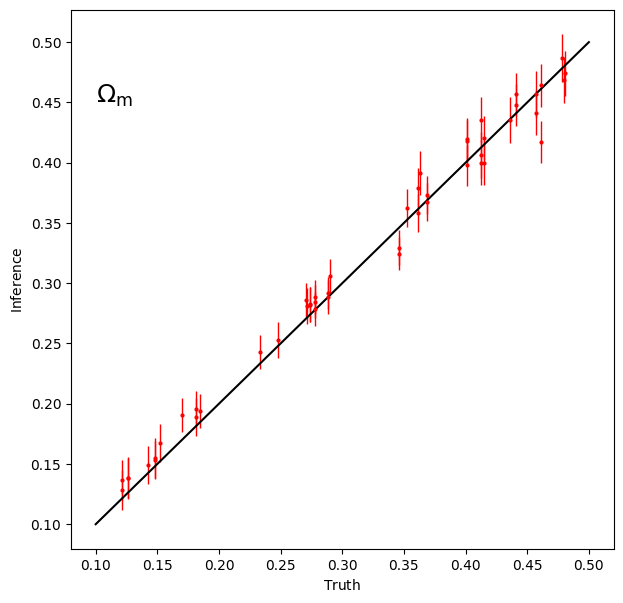

In [ ]:
import matplotlib.pyplot as plt
# select the first map of every simulation in the test set
indexes = np.arange(50)*splits

fig=plt.figure(figsize=(7,7))
plt.xlabel(r'${\rm Truth}$')
plt.ylabel(r'${\rm Inference}$')
plt.text(0.1, 0.45, r'$\Omega_{\rm m}$',fontsize=18)

plt.errorbar(params_true[indexes,0], params_NN[indexes,0], errors_NN[indexes,0],
             linestyle='None', lw=1, fmt='o', ms=2, elinewidth=1, capsize=0, c='r')
plt.plot([0.1,0.5], [0.1,0.5], color='k')

plt.show()

In [ ]:
len(test_loader)

16

In [ ]:
layer_list = ['C01', 'C02', 'C03', 'C11', 'C12', 'C13', 'C21', 'C22', 'C23', 'C31', 'C32', 'C33']
cka = CKA(models[0].module, models[1].module,
          model1_name="CNN_1",   # good idea to provide names to avoid confusion
          model2_name="CNN_2",
          model1_layers=layer_list, # List of layers to extract features from
          model2_layers=layer_list, # extracts all layer features by default
          # device='cuda'
)

cka.compare(test_loader) # secondary dataloader is optional

results = cka.export()  # returns a dict that contains model names, layer names
                        # and the CKA matrix

/usr/local/lib/python3.10/dist-packages/torch_cka/cka.py:145: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |: 100%|██████████| 16/16 [00:49<00:00,  3.08s/it]


In [ ]:
results

{'model1_name': 'CNN_1',
 'model2_name': 'CNN_2',
 'CKA': tensor([[ 0.0471,  0.0437,  0.0425,  0.0258,  0.0123, -0.0034, -0.0098, -0.0185,
          -0.0205, -0.0205, -0.0193, -0.0150],
         [ 0.0604,  0.0596,  0.0580,  0.0426,  0.0290,  0.0135,  0.0088,  0.0008,
          -0.0018, -0.0007,  0.0007,  0.0054],
         [ 0.0615,  0.0626,  0.0602,  0.0518,  0.0441,  0.0363,  0.0375,  0.0343,
           0.0325,  0.0339,  0.0355,  0.0401],
         [ 0.0647,  0.0647,  0.0619,  0.0545,  0.0486,  0.0430,  0.0462,  0.0441,
           0.0425,  0.0440,  0.0455,  0.0500],
         [ 0.0616,  0.0594,  0.0564,  0.0494,  0.0449,  0.0410,  0.0444,  0.0431,
           0.0425,  0.0435,  0.0453,  0.0504],
         [ 0.0543,  0.0518,  0.0486,  0.0444,  0.0427,  0.0428,  0.0488,  0.0499,
           0.0504,  0.0511,  0.0532,  0.0582],
         [ 0.0542,  0.0517,  0.0483,  0.0451,  0.0450,  0.0470,  0.0545,  0.0567,
           0.0576,  0.0582,  0.0603,  0.0652],
         [ 0.0595,  0.0566,  0.0532,  0.

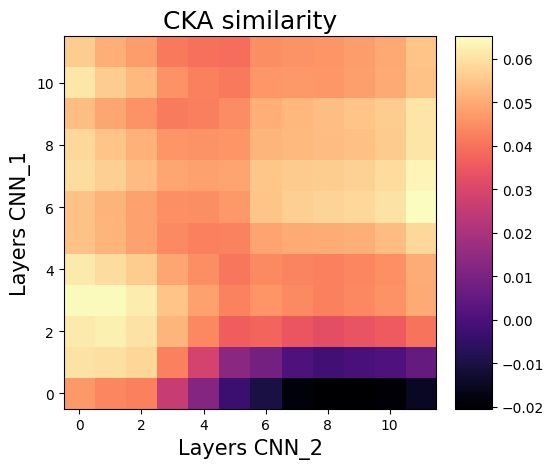

In [ ]:
cka.plot_results(save_path='/content/cka_matrix_mlp_10_layer.png', title='CKA similarity')

## CKA on weights

In [ ]:
with torch.no_grad():
  m1 = models[0].module.C01.weight.squeeze().numpy()
  m2 = models[1].module.C01.weight.squeeze().numpy()

cka_weights = np.empty((12, 12))
for i in range(12):
  for j in range(12):
    lcka = linear_CKA(
      m1[i].T,
      m2[j].T
    )
    cka_weights[i, j] = lcka

cka_weights.shape

import matplotlib.pyplot as plt
plt.imshow(cka_weights, origin='lower', cmap='magma'); plt.colorbar()